<a href="https://colab.research.google.com/github/yvettegahamanyi/AgroJob/blob/master/Template_PCA_Formative_2%5B17%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with the `fuel_econ.csv` dataset.

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

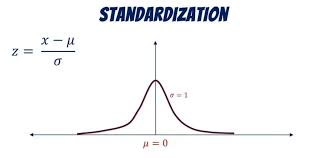


In [14]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '/covid_africa.csv'

data = pd.read_csv(file_path)
# Select only numerical columns for PCA (excluding country names)
numerical_cols = ['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases',
                 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests', 'Tests/ 1M pop', 'Population']

# Extract numerical data and handle missing values
numeric_data = data[numerical_cols].fillna(0).values  # Replace NaN with 0 for simplicity

# Standardize the data: (Data - Data Mean) / Data's Standard Deviation
data_mean = np.mean(numeric_data, axis=0)
data_std = np.std(numeric_data, axis=0)
# Avoid division by zero for columns with zero standard deviation
data_std[data_std == 0] = 1

standardized_data = (numeric_data - data_mean) / data_std
standardized_data[:5]

print(f'\original Data Shape: {standardized_data.shape}')

\original Data Shape: (54, 9)


### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [8]:
# Step 3: Calculate the Covariance Matrix
# print(type(standardized_data))

# cov_matrix = standardized_data.cov()  # Calculate covariance matrix
# cov_matrix

# Step 2: Calculate the Covariance Matrix
# Covariance matrix calculation
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)
cov_matrix


array([[ 1.01886792,  0.99563389,  0.98183004,  0.46762794,  0.11407379,
         0.51618861,  0.97033197,  0.26971644,  0.2335514 ],
       [ 0.99563389,  1.01886792,  0.95026162,  0.52606354,  0.09304069,
         0.50817262,  0.91755441,  0.21871981,  0.23333338],
       [ 0.98183004,  0.95026162,  1.01886792,  0.46552399,  0.08446655,
         0.37613777,  0.96706849,  0.23812469,  0.24544712],
       [ 0.46762794,  0.52606354,  0.46552399,  1.01886792, -0.04581984,
         0.0879343 ,  0.41591503, -0.05765491,  0.31718817],
       [ 0.11407379,  0.09304069,  0.08446655, -0.04581984,  1.01886792,
         0.66789186,  0.05118832,  0.24742459, -0.17839911],
       [ 0.51618861,  0.50817262,  0.37613777,  0.0879343 ,  0.66789186,
         1.01886792,  0.38335416,  0.58690512, -0.17574918],
       [ 0.97033197,  0.91755441,  0.96706849,  0.41591503,  0.05118832,
         0.38335416,  1.01886792,  0.27553389,  0.34497124],
       [ 0.26971644,  0.21871981,  0.23812469, -0.05765491,  0

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [9]:
# Step 4: Perform Eigendecomposition
# eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Perform eigendecomposition
# eigenvalues, eigenvectors

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
eigenvalues, eigenvectors

(array([0.00686394, 0.02652184, 0.05098704, 0.24283695, 0.60147125,
        0.67082009, 0.89057157, 2.06362374, 4.61611488]),
 array([[-0.85781665,  0.05234603, -0.00415149,  0.09037585, -0.17049446,
         -0.02700694,  0.09458899,  0.04079655, -0.46132015],
        [ 0.34022172,  0.53325765,  0.53917487,  0.2543641 , -0.16544411,
          0.06789348,  0.05272142,  0.06289606, -0.45360565],
        [ 0.22165572, -0.7213036 ,  0.26297771, -0.30971519, -0.20036995,
         -0.03068335,  0.12884374,  0.09063288, -0.44677116],
        [-0.00488831, -0.02836148, -0.10987424, -0.07323122,  0.41756288,
          0.75134977, -0.32800398,  0.27056049, -0.24912194],
        [-0.0492857 ,  0.15822482,  0.09811375, -0.48124766, -0.17972353,
         -0.07004236, -0.66361773, -0.49468937, -0.09485604],
        [ 0.13445529, -0.29371473, -0.22970336,  0.68001675,  0.09069022,
         -0.0297793 , -0.21523685, -0.50295836, -0.26844269],
        [ 0.27601566,  0.26610839, -0.72496489, -0.2374104

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [12]:
# Step 5: Sort Principal Components

# sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
# sorted_eigenvectors = sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly
# sorted_eigenvectors
# Sort eigenvalues in descending order

sorted_indices = np.argsort(eigenvalues)[::-1]

# Sort eigenvalues and eigenvectors accordingly
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

print("\nSorted Eigenvalues (descending order):")
print(sorted_eigenvalues)
print("\nSorted Eigenvectors shape:", sorted_eigenvectors.shape)



Sorted Eigenvalues (descending order):
[4.61611488 2.06362374 0.89057157 0.67082009 0.60147125 0.24283695
 0.05098704 0.02652184 0.00686394]

Sorted Eigenvectors shape: (9, 9)


### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [17]:
# Step 6: Project Data onto Principal Components

# Decide on the number of principal components to keep
# Let's keep components that explain at least 95% of the variance
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Choose number of components (e.g., to explain 95% of variance)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components to explain 95% variance: {num_components}")

# If all components are needed for 95%, let's use the first 3 for visualization
# num_components = min(num_components, 3)

# Project data onto the principal components
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])

print(f'\nReduced Data Shape: {reduced_data.shape}')
print("First 5 rows of reduced data:")
print(reduced_data[:5])



Number of components to explain 95% variance: 2

Reduced Data Shape: (54, 2)
First 5 rows of reduced data:
[[-0.83370033  2.00688042]
 [ 0.6238825   0.61710978]
 [ 0.99381882  0.3396468 ]
 [-1.04145322 -3.29721534]
 [ 1.0290504   0.521211  ]]


### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [15]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (54, 5)


array([[-0.83370033,  2.00688042, -1.75590104,  3.17932699,  1.6195589 ],
       [ 0.6238825 ,  0.61710978,  0.04172926, -0.30244647, -0.27396642],
       [ 0.99381882,  0.3396468 ,  0.2616186 ,  0.10746864, -0.44823879],
       [-1.04145322, -3.29721534,  0.39564607, -0.29884166,  1.5345    ],
       [ 1.0290504 ,  0.521211  ,  0.07944467, -0.00967661, -0.43503215]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

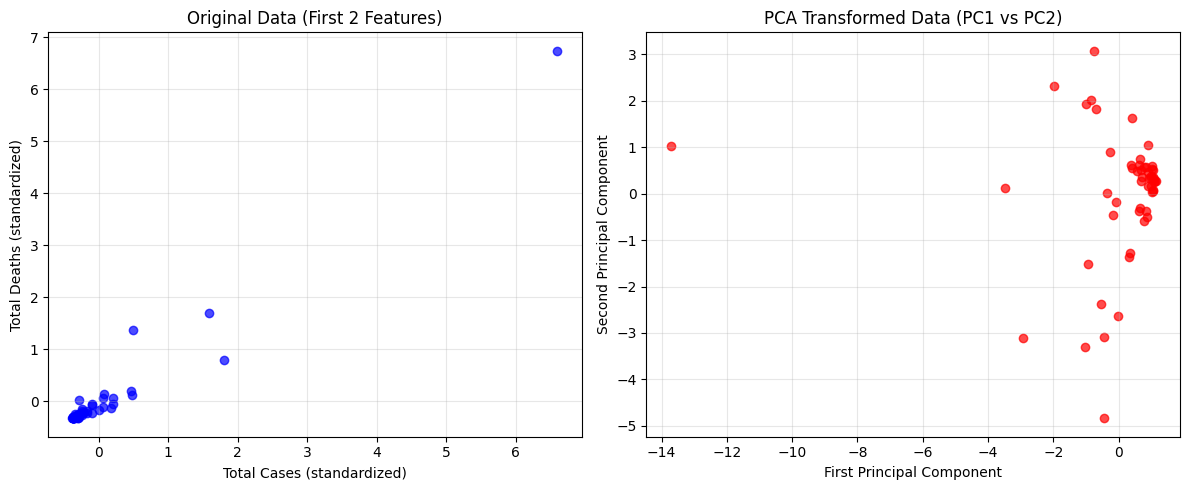

In [16]:
# Step 8: Visualize Before and After PCA

# v=plt.figure(figsize=(12, 5))


# # Plot original data (first two features for simplicity)

# plt.subplot(1, 2, 1)
# plt.scatter(numeric_df.iloc[:, 0], numeric_df.iloc[:, 1], c='skyblue', edgecolors='k')
# plt.title('Original Data (First 2 Features)')
# plt.xlabel(numeric_df.columns[0])
# plt.ylabel(numeric_df.columns[1])

# # Plot reduced data after PCA
# plt.subplot(1, 2, 2)
# plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c='salmon', edgecolors='k')
# plt.title('Reduced Data (PCA 2 Components)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')

# plt.tight_layout()
# plt.show()




# Step 6: Visualize Before and After PCA
plt.figure(figsize=(12, 5))

# Plot 1: Original data (first two features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.7, c='blue')
plt.xlabel(f'{numerical_cols[0]} (standardized)')
plt.ylabel(f'{numerical_cols[1]} (standardized)')
plt.title('Original Data (First 2 Features)')
plt.grid(True, alpha=0.3)

# Plot 3: PCA data (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.7, c='red')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Transformed Data (PC1 vs PC2)')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
